In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [13]:
df.head(), df.shape

(   uid        asin                                              title  stars  \
 0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
 1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
 2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
 3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
 4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   
 
    reviews  price  isBestSeller  boughtInLastMonth        category  
 0    15308  21.99         False                  0  Hi-Fi Speakers  
 1    98099  23.99          True                  0  Hi-Fi Speakers  
 2    15308  21.99         False                  0  Hi-Fi Speakers  
 3     7205  31.99         False                  0  Hi-Fi Speakers  
 4     1881  17.99         False                  0  Hi-Fi Speakers  ,
 (2443651, 9))

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [5]:
df_crosstab = pd.crosstab(df["category"], df["isBestSeller"])
df_crosstab.columns = ["Nor Best Seller", "Best Seller"]
df_crosstab["Total"] = df_crosstab.sum(axis=1)
df_crosstab["Best Seller Proportion"] = df_crosstab["Best Seller"] / df_crosstab["Total"]

df_crosstab_sorted = df_crosstab.sort_values("Best Seller Proportion", ascending=False)
df_crosstab_sorted

,Nor Best Seller,Best Seller,Total,Best Seller Proportion
category,,,,
Grocery,9008,556,9564,0.058135
Smart Home Security & Lighting,98,6,104,0.057692
Health & Personal Care,9017,552,9569,0.057686
Mobile Phone Accessories,248,11,259,0.042471
Power & Hand Tools,8353,306,8659,0.035339
...,...,...,...,...
"CD, Disc & Tape Players",8798,0,8798,0.000000
General Music-Making Accessories,259,0,259,0.000000
Snowboard Boots,1449,0,1449,0.000000


In [6]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(df["category"], df["isBestSeller"]))

chi2, p, dof, expected

(36540.20270061387,
 0.0,
 295,
 array([[2.47190130e+02, 8.09870149e-01],
        [4.05371878e+03, 1.32812173e+01],
        [2.49183599e+02, 8.16401360e-01],
        [1.69145827e+03, 5.54173243e+00],
        [2.53170536e+02, 8.29463782e-01],
        [8.50214439e+03, 2.78556144e+01],
        [1.06650580e+02, 3.49419782e-01],
        [2.57157474e+02, 8.42526204e-01],
        [9.51781673e+03, 3.11832664e+01],
        [1.50008526e+04, 4.91473619e+01],
        [9.32544700e+03, 3.05530045e+01],
        [2.38219520e+02, 7.80479700e-01],
        [3.22941944e+03, 1.05805616e+01],
        [9.44704859e+03, 3.09514084e+01],
        [6.68808779e+03, 2.19122125e+01],
        [5.26275760e+02, 1.72423967e+00],
        [1.90296531e+04, 6.23469391e+01],
        [2.77191835e+03, 9.08164873e+00],
        [2.53170536e+02, 8.29463782e-01],
        [4.04674164e+02, 1.32583581e+00],
        [1.92489346e+04, 6.30653723e+01],
        [3.10482764e+03, 1.01723609e+01],
        [2.04330551e+02, 6.69449115e-01],
  

In [7]:
import numpy as np

n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(df_crosstab.shape) -1)))
cramers_v

0.07060009062187608

In [8]:
import matplotlib.pyplot as plt

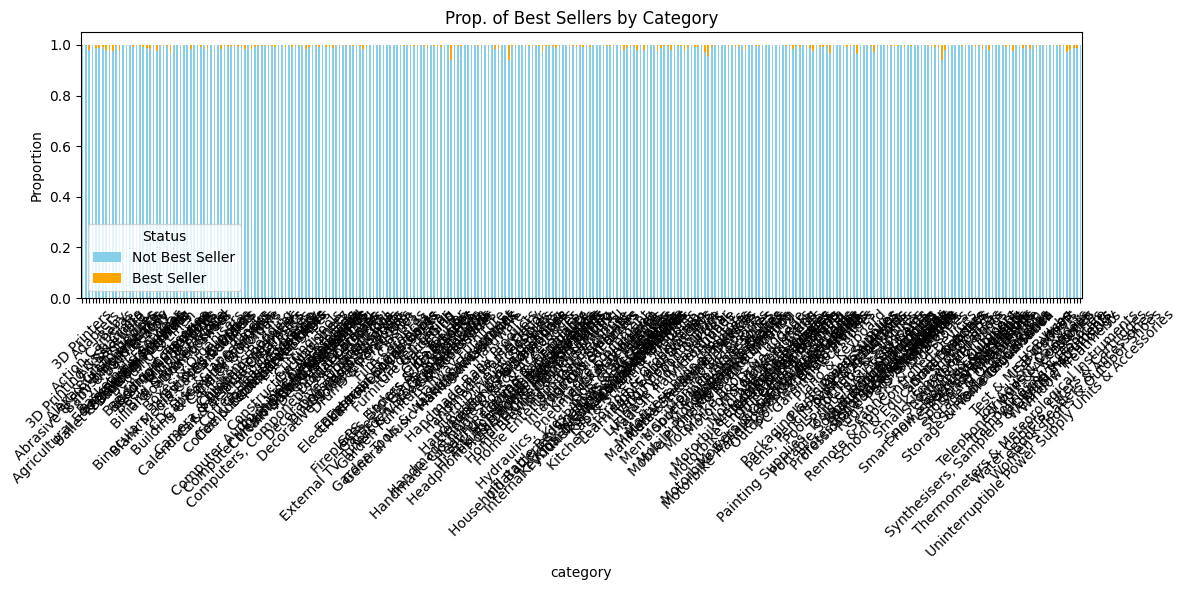

In [10]:
category_counts = pd.crosstab(df["category"], df["isBestSeller"])
category_counts_norm = category_counts.div(category_counts.sum(axis=1), axis=0)

category_counts_norm.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=["skyblue","orange"]
)
plt.ylabel("Proportion")
plt.title("Prop. of Best Sellers by Category")
plt.legend(["Not Best Seller", "Best Seller"], title = "Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [15]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5* IQR

df_no_outliers = df[(df["price"] >= lower_limit) & (df["price"] <= upper_limit)]

df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df_no_outliers.columns
df_no_outliers = df_no_outliers.rename(columns=lambda x: x.strip().lower())

In [40]:
top20_categories = df_no_outliers["category"].value_counts().head(20).index
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top20_categories)]
df_top20["category"] = df_top20["category"].astype(str)
df_top20

C:\Users\levgi\AppData\Local\Temp\ipykernel_12536\1020118246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top20["category"] = df_top20["category"].astype(str)


,uid,asin,title,stars,reviews,price,isbestseller,boughtinlastmonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


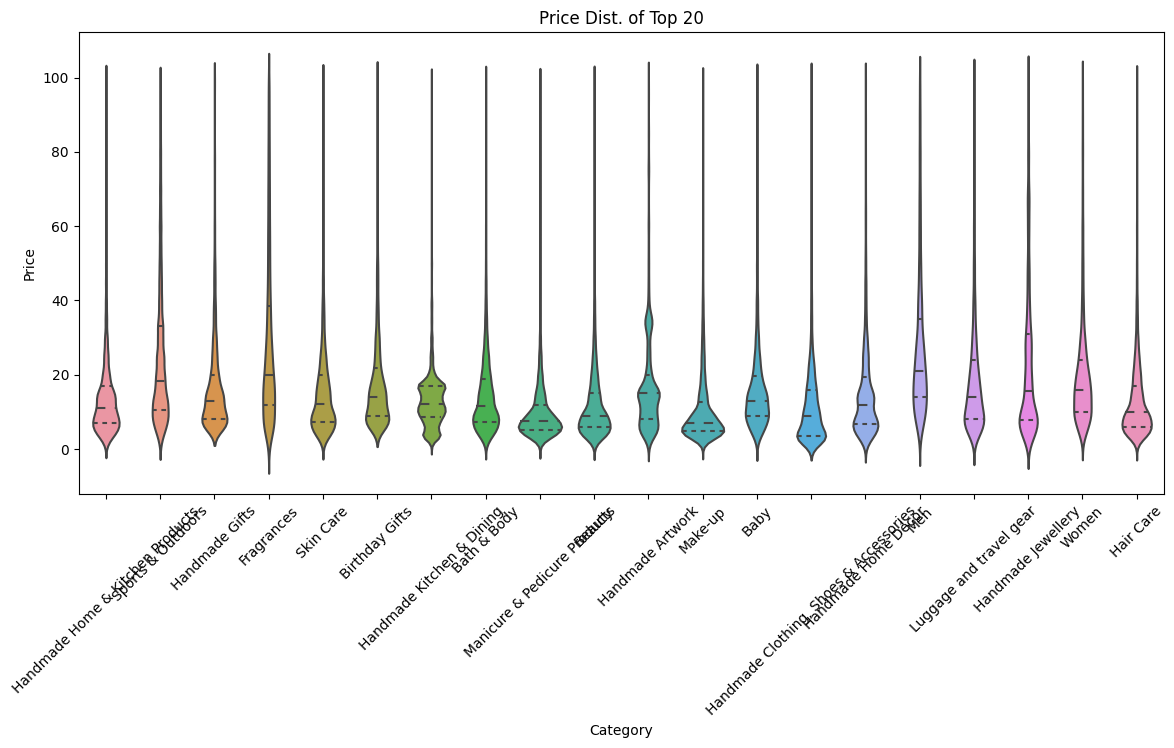

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(x='category', y="price", data=df_top20, inner="quartile")
plt.xticks(rotation=45)
plt.title("Price Dist. of Top 20")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

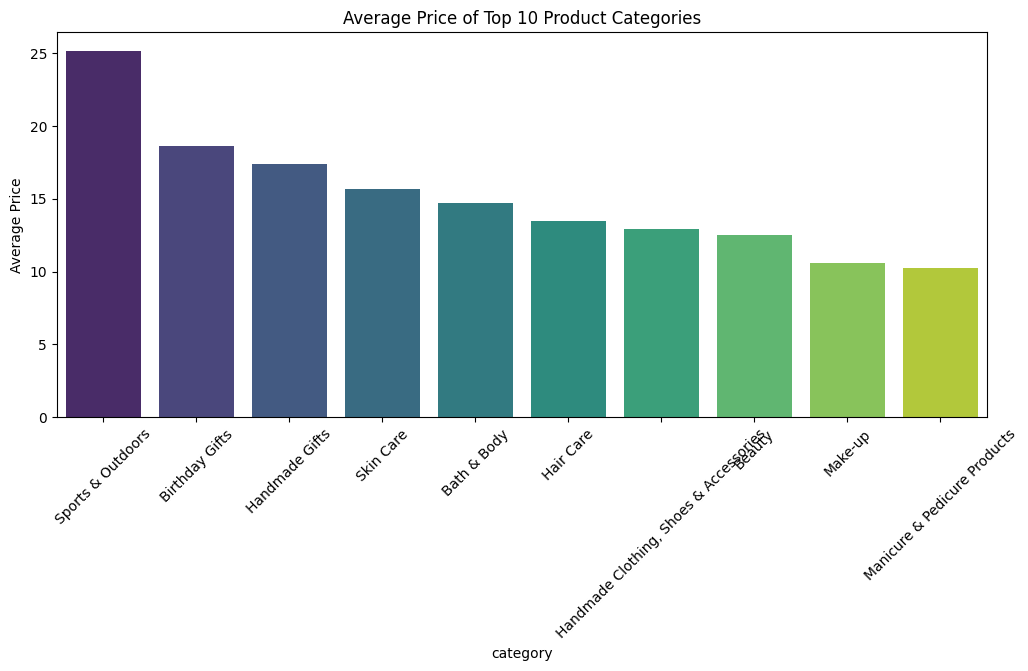

category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64

In [45]:
# Top 10 categories by count
top10_categories = df_no_outliers['category'].value_counts().head(10).index
avg_price_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_categories)].groupby('category')['price'].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12,5))
sns.barplot(x=avg_price_top10.index, y=avg_price_top10.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.title('Average Price of Top 10 Product Categories')
plt.show()

# Average price across all categories
avg_price_all = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)
avg_price_all.head(5)


In [47]:
df_top10_ratings

,uid,asin,title,stars,reviews,price,isbestseller,boughtinlastmonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


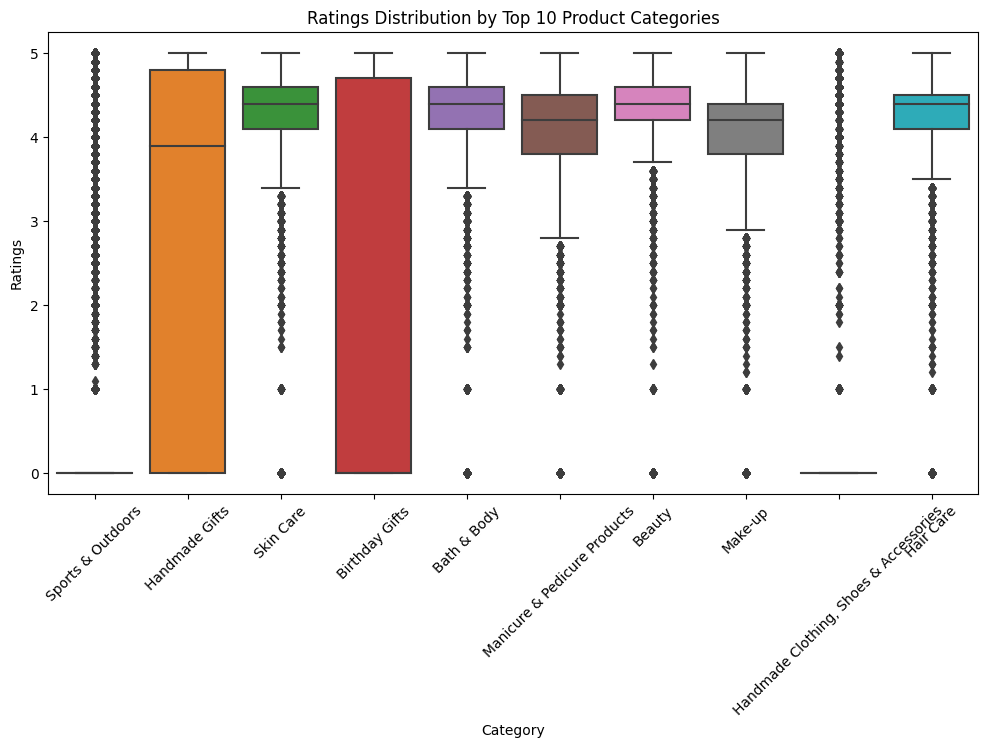

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Name: stars, dtype: float64

In [55]:
# Top 10 categories by count
df_top10_ratings = df_no_outliers[df_no_outliers['category'].isin(top10_categories)]

plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='stars', data=df_top10_ratings)
plt.xticks(rotation=45)
plt.title('Ratings Distribution by Top 10 Product Categories')
plt.ylabel('Ratings')
plt.xlabel('Category')
plt.show()

# Median ratings across all categories
median_ratings = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
median_ratings.head(5)